In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#step1
def intialize_parameter(lenw):
  w = np.zeros((1, lenw))
  b = 0
  return w, b

In [ ]:
#step 2
def forward_propogation(X, w, b):
  z = np.dot(w, X) + b
  return z

In [ ]:
#step 3
def cost_function(z, y):
  m = y.shape[1]
  J = (1/(2*m)) * np.sum(np.square(z-y))
  return J

In [ ]:
#step4
def back_propogation(X, y, z):
  m = y.shape[1]
  dz = (1/m)*(z-y)
  dw = np.dot(dz, X.T)
  db = np.sum(dz)
  return dw, db

In [ ]:
#step5
def gradient_descent_update(w, b, dw, db, learning_rate):
  w = w - learning_rate*dw
  b = b - learning_rate*db
  return w, b

In [ ]:
#step6
def linear_regression_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
  lenw = X_train.shape[0]
  w, b = intialize_parameter(lenw)

  costs_train = []
  m_train = y_train.shape[1]
  m_val = y_val.shape[1]

  for i in range(1, epochs+1):
    z_train = forward_propogation(X_train, w, b)
    cost_train = cost_function(z_train, y_train)
    dw, db = back_propogation(X_train, y_train, z_train)
    w, b = gradient_descent_update(w, b, dw, db, learning_rate)

    if i%10 == 0:
      costs_train.append(cost_train)
    
    MAE_train = (1/m_train)*np.sum(np.abs(z_train - y_train))

    z_val = forward_propogation(X_val, w,b)
    cost_val = cost_function(z_val, y_val)
    MAE_val = (1/m_val)*np.sum(np.abs(z_val - y_val))

  plt.plot(costs_train)
  plt.show()

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston_house = pd.DataFrame(boston['data'])

In [ ]:
boston_house.columns = boston['feature_names']

In [ ]:
boston_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X = boston_house

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
# X = (boston_house - boston_house.mean())/(boston_house.max() - boston_house.min())
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
standardscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

In [ ]:
X_scaled = minmaxscaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [ ]:
y = boston['target']
y.shape

(506,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [ ]:
X_train = X_train.T
print(X_train.shape)

(13, 354)


In [ ]:
y_train = np.array([y_train])
print(y_train.shape)

(1, 354)


In [ ]:
x_val = x_val.T
print(x_val.shape)

(13, 152)


In [ ]:
y_val = np.array([y_val])
print(y_val.shape)

(1, 152)


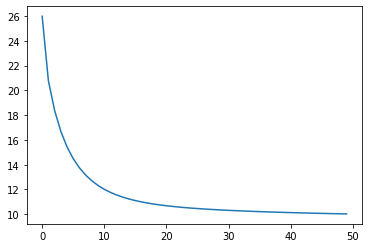

In [ ]:
linear_regression_model(X_train, y_train, x_val, y_val, 0.4, 500)